# Линейная регрессия

## Построение линии регрессии

Суть линейной регрессии в моделировании линейной зависимости между признаками и целевой переменной. Предполагается, что зависимость описывается линейной функцией с коэффициентами, которые подбираются в процессе обучения таким образом, чтобы минимизировать значение функции потерь.

Модель линейной регрессии:
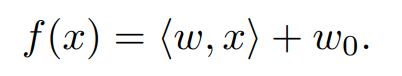

### Используемые библиотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import warnings

### Датасет

In [ ]:
diabetes = load_diabetes(scaled=False)
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print(f"Размер датасета: {df.shape}")
print("Пример данных:")
print(df.head(10))
print(df.describe().round(2))

Размер датасета: (442, 11)
Пример данных:
    age  sex   bmi     bp     s1     s2    s3    s4      s5    s6  target
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.00  4.8598  87.0   151.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.00  3.8918  69.0    75.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.00  4.6728  85.0   141.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.00  4.8903  89.0   206.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.00  4.2905  80.0   135.0
5  23.0  1.0  22.6   89.0  139.0   64.8  61.0  2.00  4.1897  68.0    97.0
6  36.0  2.0  22.0   90.0  160.0   99.6  50.0  3.00  3.9512  82.0   138.0
7  66.0  2.0  26.2  114.0  255.0  185.0  56.0  4.55  4.2485  92.0    63.0
8  60.0  2.0  32.1   83.0  179.0  119.4  42.0  4.00  4.4773  94.0   110.0
9  29.0  1.0  30.0   85.0  180.0   93.4  43.0  4.00  5.3845  88.0   310.0
          age     sex     bmi      bp      s1      s2      s3      s4      s5  \
count  442.00  442.00  442.00  442.00  442.00  442.00  442.00  

### Предварительная обработка датасета

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер тренировочной выборки: (353, 10)
Размер тестовой выборки: (89, 10)


### Тепловая карта

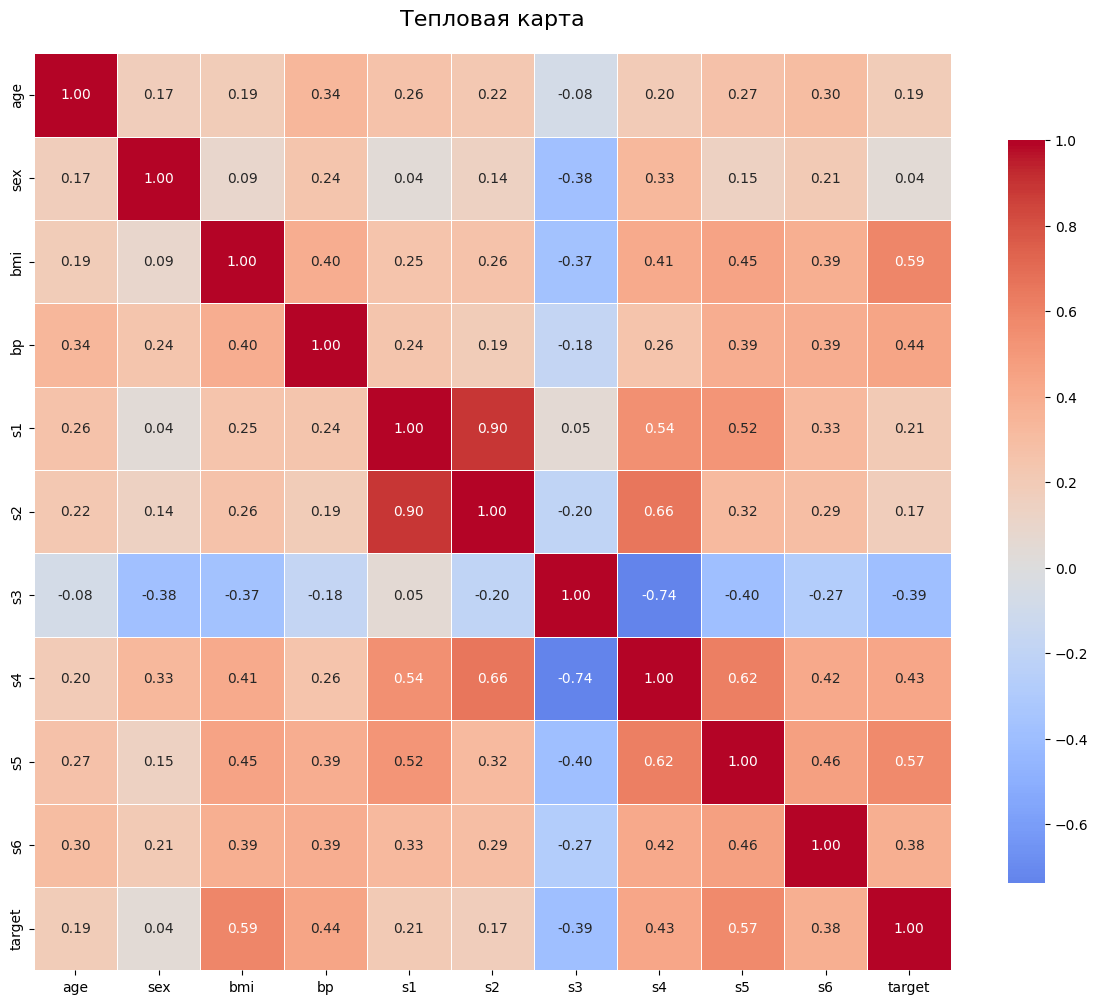

Корреляции признаков с целевой переменной:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title('Тепловая карта', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("Корреляции признаков с целевой переменной:")
target_correlations = correlation_matrix['target'].sort_values(ascending=False)
print(target_correlations)

### Обучение модели

In [ ]:
linear_model = LinearRegression()
sgd_model = SGDRegressor(
    max_iter=1000,
    tol=1e-3,
    penalty='l2',
    alpha=0.01,
    random_state=42,
    learning_rate='adaptive',
    eta0=0.01
)

linear_model.fit(X_train_scaled, y_train)
sgd_model.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.01, learning_rate='adaptive', random_state=42)

### Прогнозы модели

In [ ]:
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_sgd = sgd_model.predict(X_test_scaled)

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Метрики для модели {model_name}:")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE:  {mae:.2f}")
    print(f"MAPE:  {mape:.2f}")
    print(f" R²:   {r2:.4f}")

    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2}

metrics_linear = evaluate_model(y_test, y_pred_linear, "Линейная регрессия (OLS)")
metrics_sgd = evaluate_model(y_test, y_pred_sgd, "SGD регрессия")

Метрики для модели Линейная регрессия (OLS):
MSE:  2900.19
RMSE: 53.85
MAE:  42.79
MAPE:  0.37
 R²:   0.4526
Метрики для модели SGD регрессия:
MSE:  2883.95
RMSE: 53.70
MAE:  42.87
MAPE:  0.37
 R²:   0.4557


### Графики выходных результатов

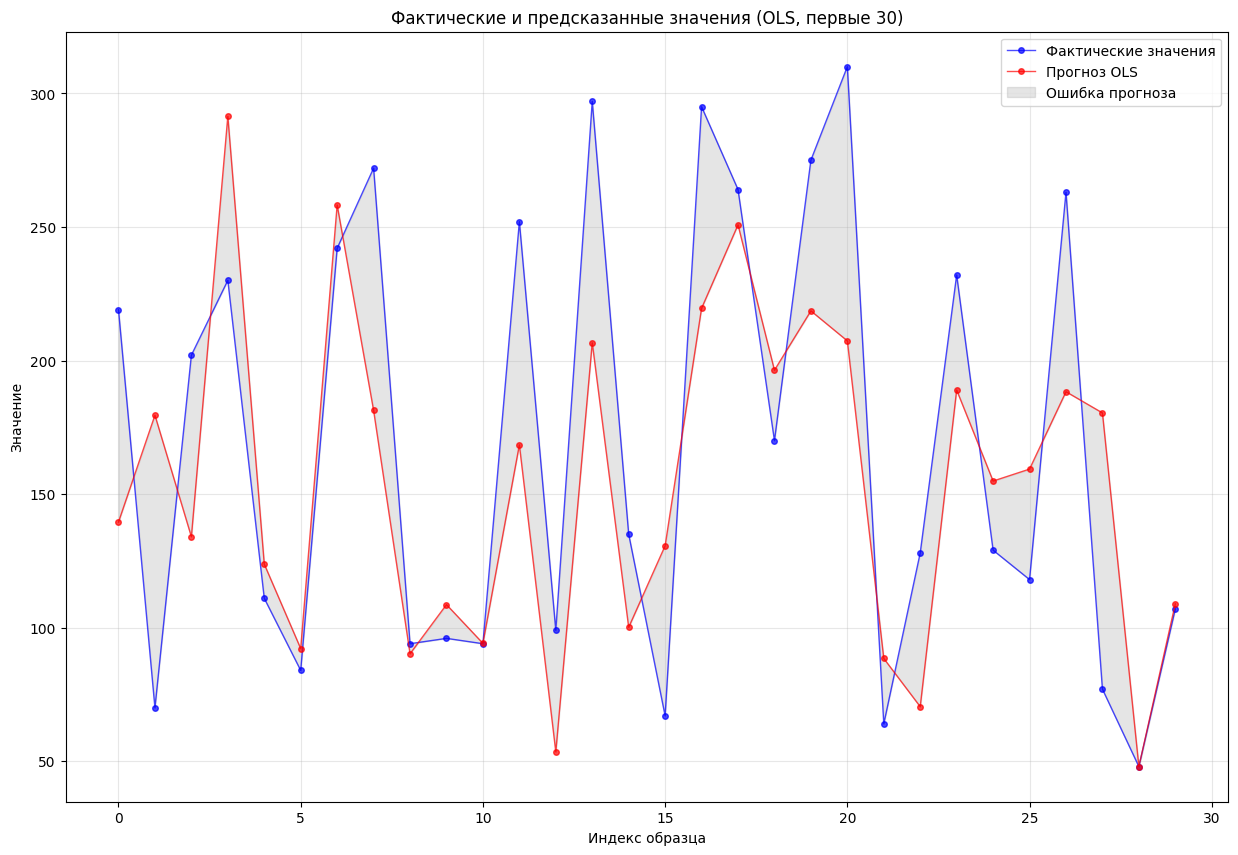

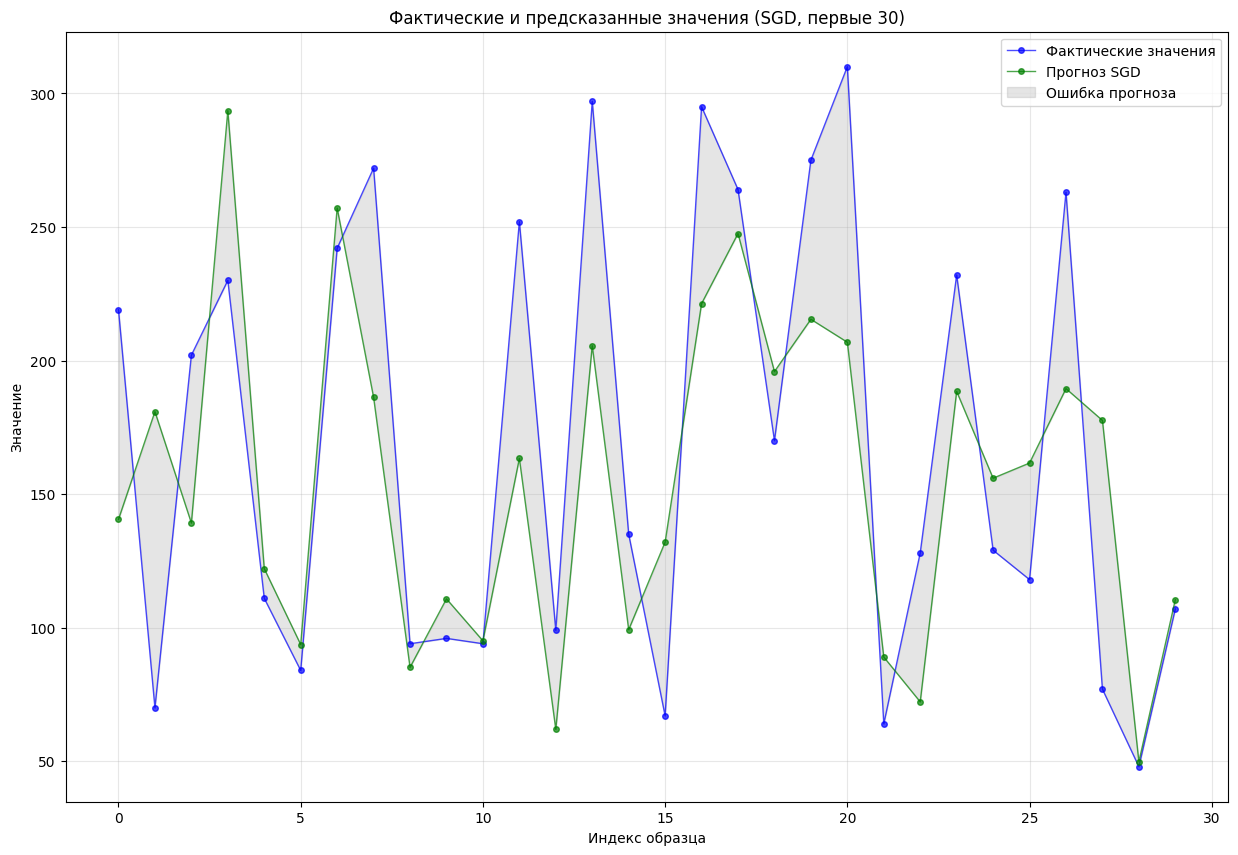

In [ ]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
indices = range(len(y_test))
ax1.plot(indices[:30], y_test.values[:30], 'bo-', label='Фактические значения',
                markersize=4, linewidth=1, alpha=0.7)
ax1.plot(indices[:30], y_pred_linear[:30], 'ro-', label='Прогноз OLS',
                markersize=4, linewidth=1, alpha=0.7)
ax1.fill_between(indices[:30], y_test.values[:30], y_pred_linear[:30],
                        alpha=0.2, color='gray', label='Ошибка прогноза')
ax1.set_xlabel('Индекс образца')
ax1.set_ylabel('Значение')
ax1.set_title('Фактические и предсказанные значения (OLS, первые 30)')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

fig2, ax2 = plt.subplots(figsize=(15, 10))
ax2.plot(indices[:30], y_test.values[:30], 'bo-', label='Фактические значения',
                markersize=4, linewidth=1, alpha=0.7)
ax2.plot(indices[:30], y_pred_sgd[:30], 'go-', label='Прогноз SGD',
                markersize=4, linewidth=1, alpha=0.7)
ax2.fill_between(indices[:30], y_test.values[:30], y_pred_sgd[:30],
                        alpha=0.2, color='gray', label='Ошибка прогноза')
ax2.set_xlabel('Индекс образца')
ax2.set_ylabel('Значение')
ax2.set_title('Фактические и предсказанные значения (SGD, первые 30)')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Деревья решений

## Классификационное дерево и Random Forest

Классификационное дерево - дерево, в котором каждый узел проверяет условие на одном из признаков и разделяет входную выборку на части таким образом, чтобы уменьшить разнородность объектов в каждом из дочерних листов. Листья дерева соответствуют итоговым классам.

Random Forest - ансамблевый метод, который строит множество классификационных деревьев на случайных подвыборках данных и случайных подмножествах признаков. Итоговый прогноз определяется голосованием всех деревьев.

### Используемые библиотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.tree import plot_tree

### Датасет

Размерность данных: (1797, 65)
Количество классов: 10
Пример данных:
   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0      0.0      0.0      5.0     13.0      9.0      1.0      0.0      0.0   
1      0.0      0.0      0.0     12.0     13.0      5.0      0.0      0.0   
2      0.0      0.0      0.0      4.0     15.0     12.0      0.0      0.0   
3      0.0      0.0      7.0     15.0     13.0      1.0      0.0      0.0   
4      0.0      0.0      0.0      1.0     11.0      0.0      0.0      0.0   

   pixel_8  pixel_9  ...  pixel_55  pixel_56  pixel_57  pixel_58  pixel_59  \
0      0.0      0.0  ...       0.0       0.0       0.0       6.0      13.0   
1      0.0      0.0  ...       0.0       0.0       0.0       0.0      11.0   
2      0.0      0.0  ...       0.0       0.0       0.0       0.0       3.0   
3      0.0      8.0  ...       0.0       0.0       0.0       7.0      13.0   
4      0.0      0.0  ...       0.0       0.0       0.0       0.0       2.0   


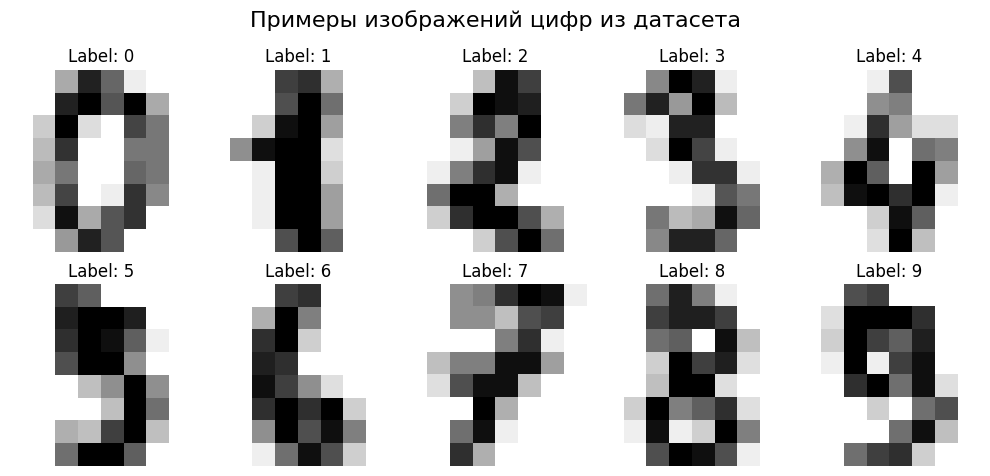

In [ ]:
digits = datasets.load_digits()

df = pd.DataFrame(data=digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])
df['target'] = digits.target

print(f"Размерность данных: {df.shape}")
print(f"Количество классов: {df['target'].nunique()}")
print("Пример данных:")
print(df.head())

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.set_title(f"Label: {df.loc[i, 'target']}")
    ax.axis('off')
plt.suptitle('Примеры изображений цифр из датасета', fontsize=16)
plt.tight_layout()
plt.show()

### Предварительная обработка датасета

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Распределение классов в обучающей выборке:\n{y_train.value_counts().sort_index()}")
print(f"Распределение классов в тестовой выборке:\n{y_test.value_counts().sort_index()}")

Размер обучающей выборки: (1437, 64)
Размер тестовой выборки: (360, 64)
Распределение классов в обучающей выборке:
target
0    142
1    146
2    142
3    146
4    145
5    145
6    145
7    143
8    139
9    144
Name: count, dtype: int64
Распределение классов в тестовой выборке:
target
0    36
1    36
2    35
3    37
4    36
5    37
6    36
7    36
8    35
9    36
Name: count, dtype: int64


### Тепловая карта

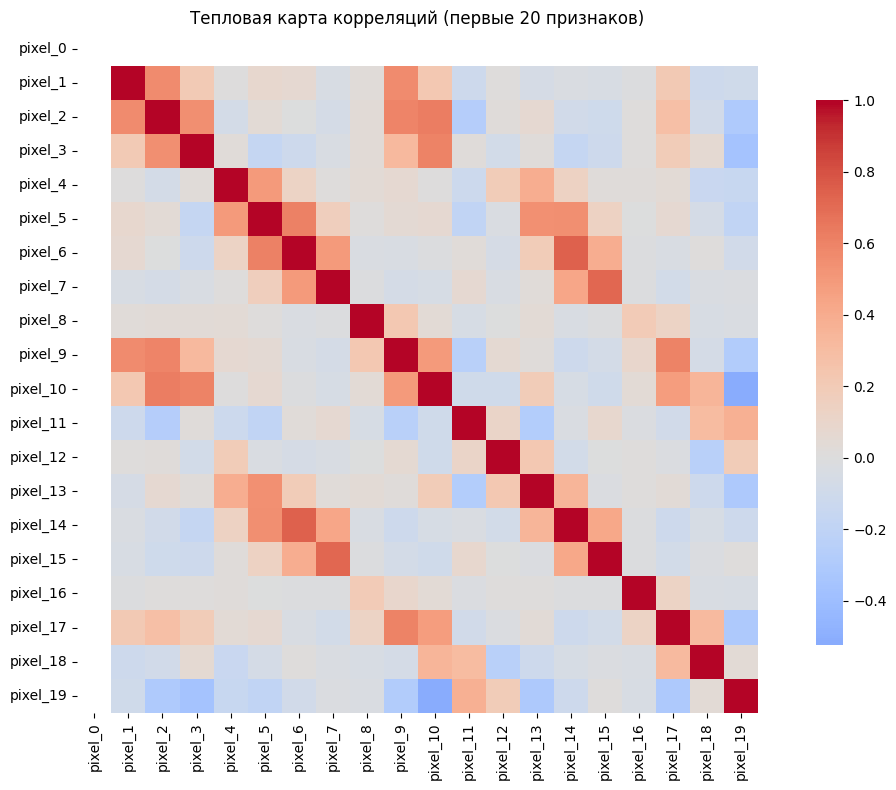

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


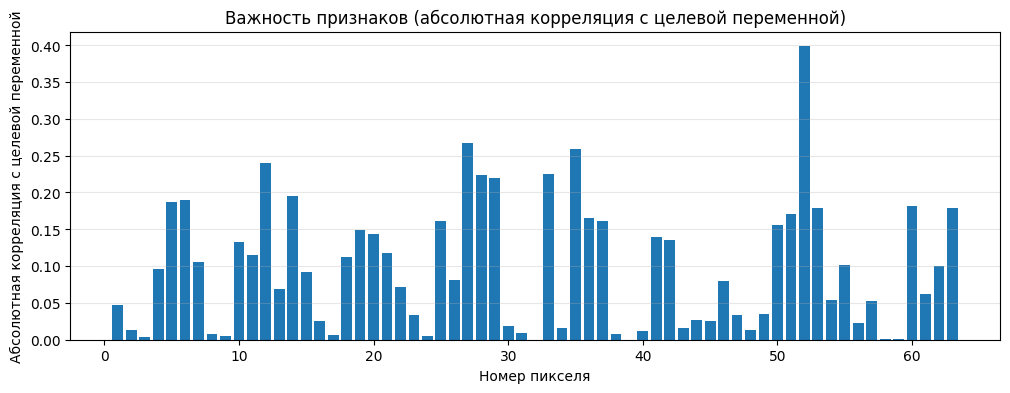

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = X_train.iloc[:, :20].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, cbar_kws={"shrink": 0.8})
plt.title('Тепловая карта корреляций (первые 20 признаков)')
plt.tight_layout()
plt.show()

corr_with_target = []
for column in X_train.columns:
    corr = X_train[column].corr(y_train)
    corr_with_target.append(abs(corr))

corr_df = pd.DataFrame({
    'pixel': X_train.columns,
    'correlation': corr_with_target
}).sort_values('correlation', ascending=False)

plt.figure(figsize=(12, 4))
plt.bar(range(len(corr_with_target)), corr_with_target)
plt.xlabel('Номер пикселя')
plt.ylabel('Абсолютная корреляция с целевой переменной')
plt.title('Важность признаков (абсолютная корреляция с целевой переменной)')
plt.grid(axis='y', alpha=0.3)

### Обучение модели

In [ ]:
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5
)
dt_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

### Прогнозы модели

In [ ]:
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"\nТочность Decision Tree: {accuracy_dt:.4f}")
print(f"Точность Random Forest: {accuracy_rf:.4f}")


Точность Decision Tree: 0.6667
Точность Random Forest: 0.9611


### Графики выходных результатов

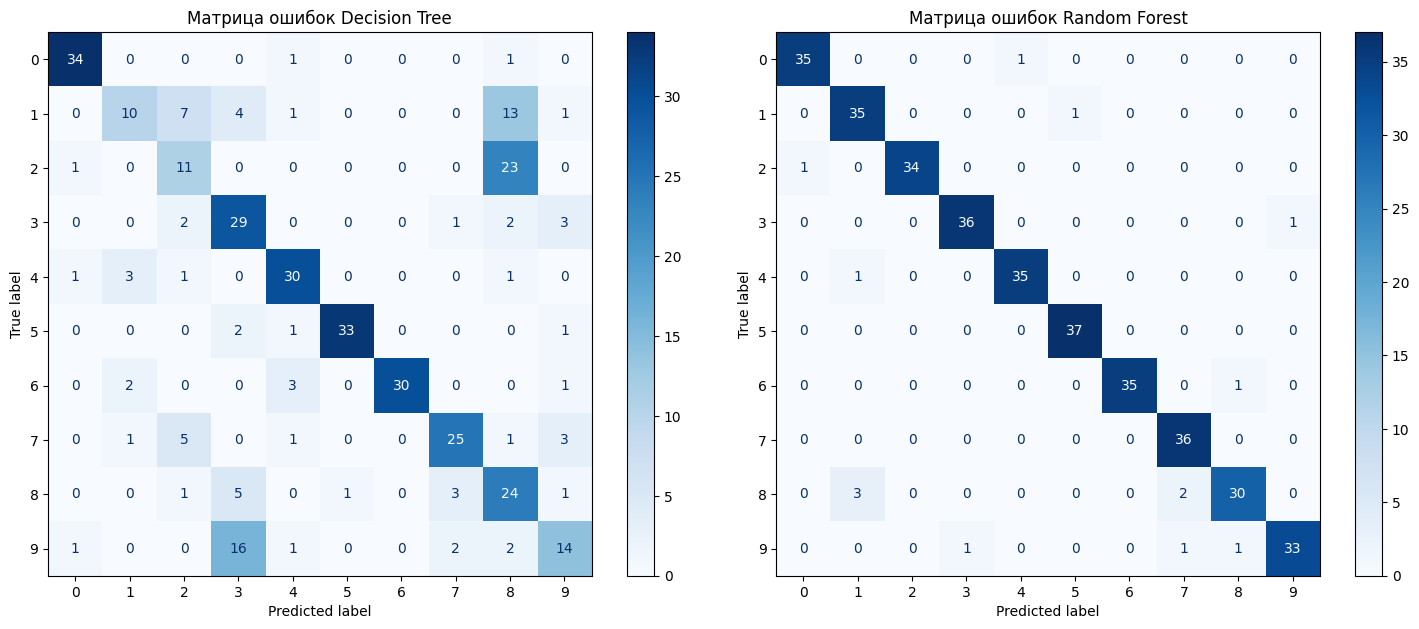

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=range(10))
disp_dt.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title(f'Матрица ошибок Decision Tree')

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=range(10))
disp_rf.plot(ax=axes[1], cmap='Blues', values_format='d')
axes[1].set_title(f'Матрица ошибок Random Forest')

plt.tight_layout()
plt.show()

## Дерево решений - регрессор

Дерево решений для регрессии - дерево решений, которое предсказывает непрерывные значения, разбивая данные на подмножества на основе значений признаков. Для регрессии в качестве критерия оптимизации используется ошибка.

### Используемые библиотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import plot_tree
from sklearn.datasets import load_diabetes
import warnings

### Датасет

In [ ]:
diabetes = load_diabetes(scaled=False)
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print(f"Размер датасета: {df.shape}")
print("Пример данных:")
print(df.head(10))
print(df.describe().round(2))

Размер датасета: (442, 11)
Пример данных:
    age  sex   bmi     bp     s1     s2    s3    s4      s5    s6  target
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.00  4.8598  87.0   151.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.00  3.8918  69.0    75.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.00  4.6728  85.0   141.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.00  4.8903  89.0   206.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.00  4.2905  80.0   135.0
5  23.0  1.0  22.6   89.0  139.0   64.8  61.0  2.00  4.1897  68.0    97.0
6  36.0  2.0  22.0   90.0  160.0   99.6  50.0  3.00  3.9512  82.0   138.0
7  66.0  2.0  26.2  114.0  255.0  185.0  56.0  4.55  4.2485  92.0    63.0
8  60.0  2.0  32.1   83.0  179.0  119.4  42.0  4.00  4.4773  94.0   110.0
9  29.0  1.0  30.0   85.0  180.0   93.4  43.0  4.00  5.3845  88.0   310.0
          age     sex     bmi      bp      s1      s2      s3      s4      s5  \
count  442.00  442.00  442.00  442.00  442.00  442.00  442.00  

### Предварительная обработка датасета

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Обучающая выборка: {X_train.shape[0]} samples")
print(f"Тестовая выборка: {X_test.shape[0]} samples")

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

Обучающая выборка: 353 samples
Тестовая выборка: 89 samples


### Тепловая карта

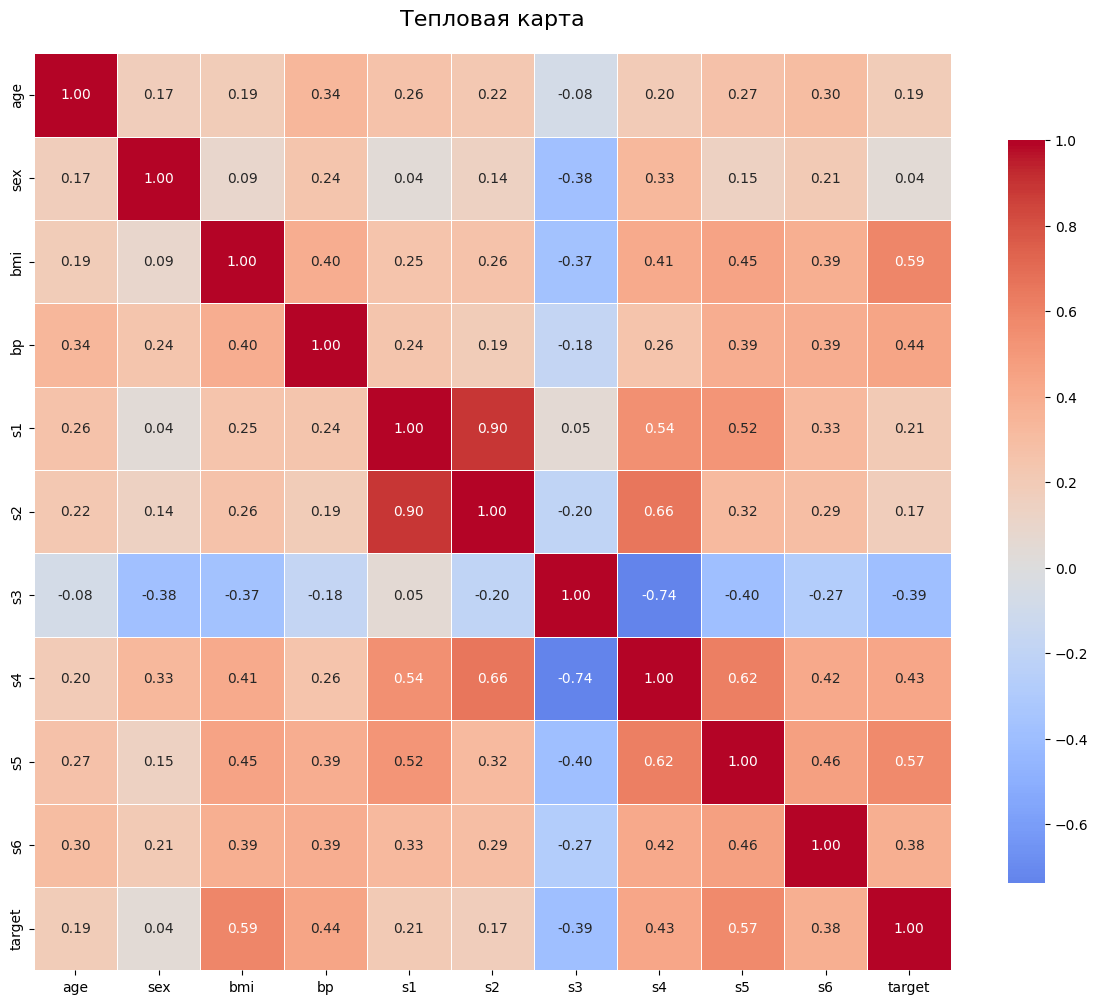

Корреляции признаков с целевой переменной:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title('Тепловая карта', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("Корреляции признаков с целевой переменной:")
target_correlations = correlation_matrix['target'].sort_values(ascending=False)
print(target_correlations)

### Обучение модели

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)


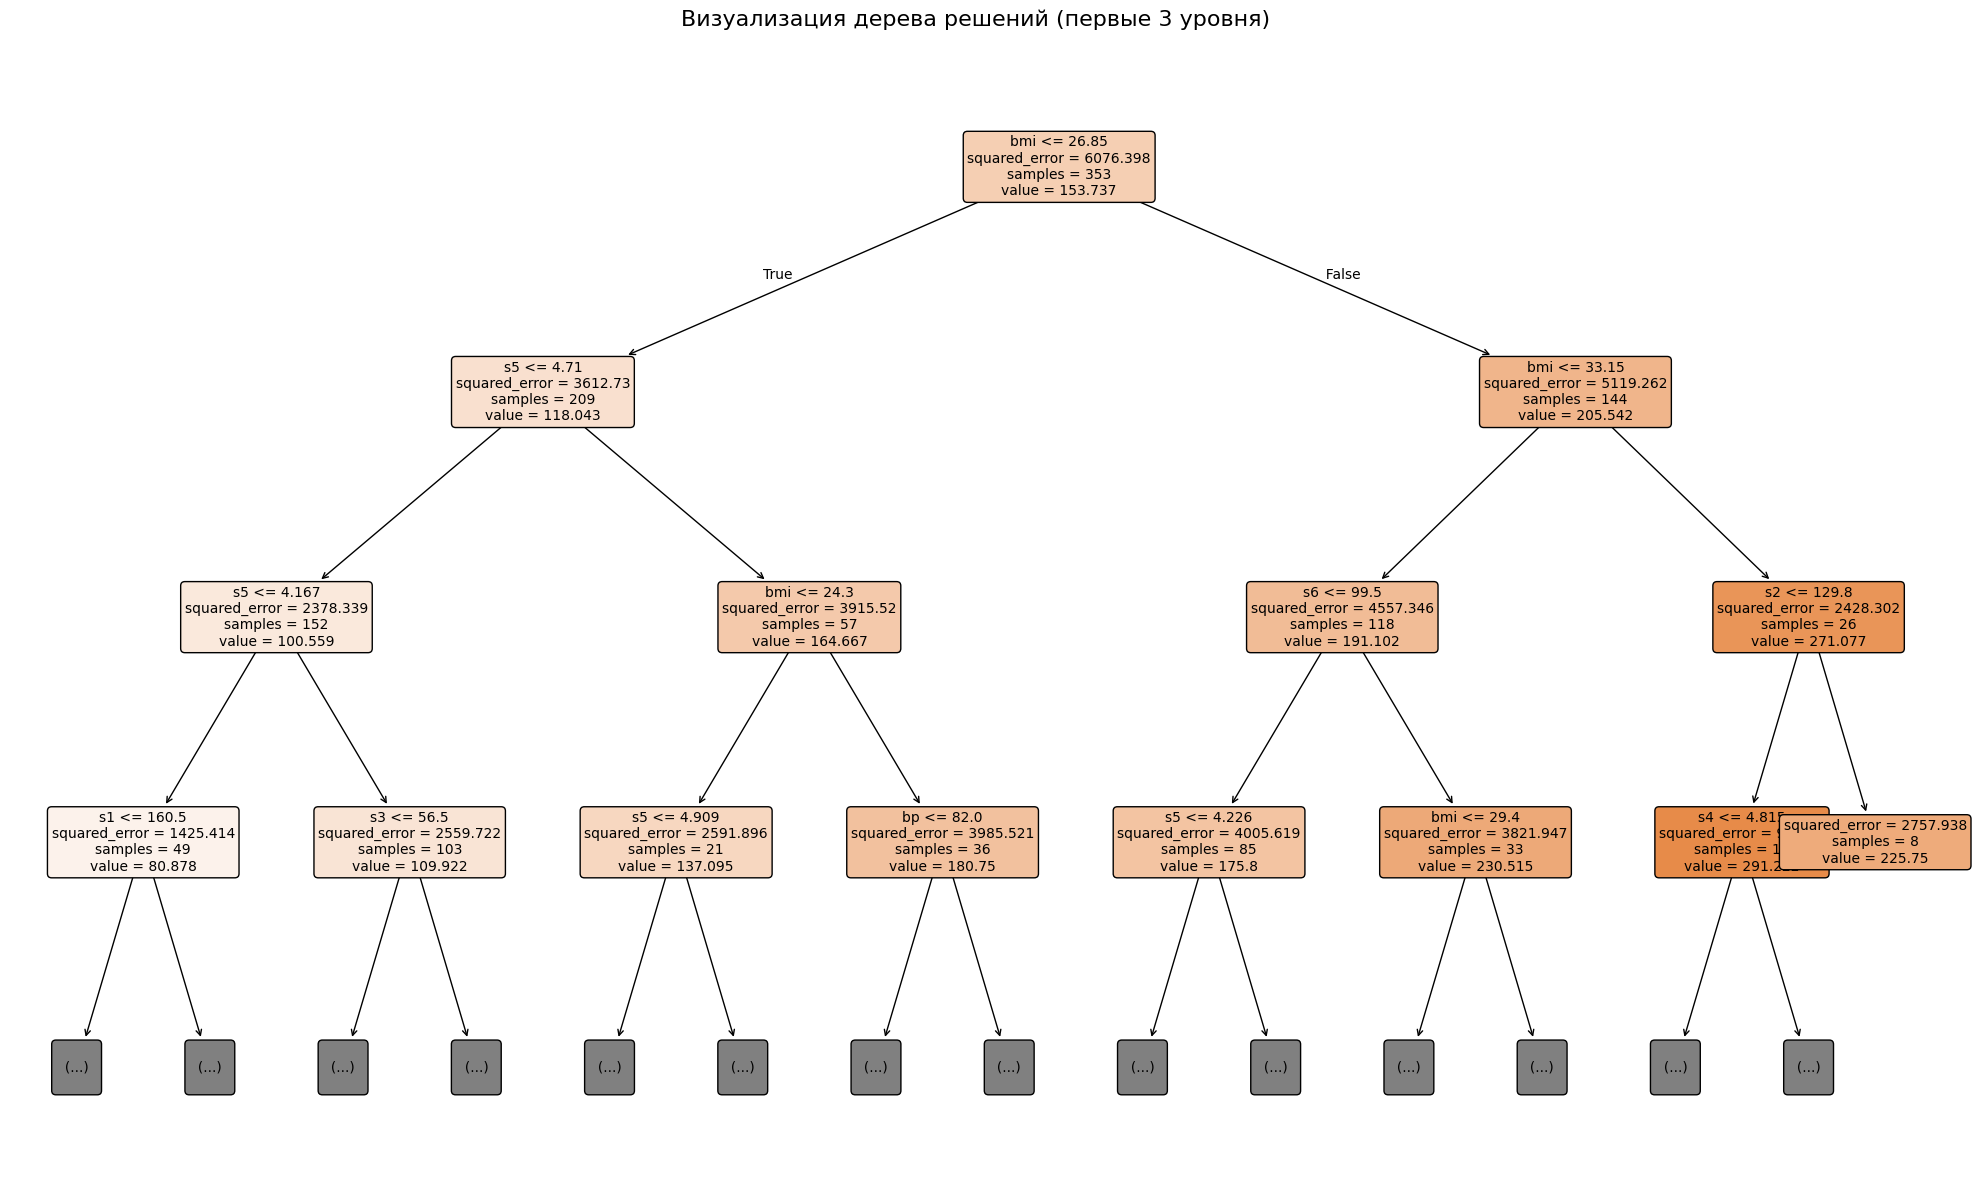

Важность признаков:
Признак  Важность
    bmi  0.591062
     s5  0.207965
     s6  0.050632
     s1  0.042016
     bp  0.038085
     s4  0.024871
     s2  0.018227
     s3  0.017136
    age  0.008161
    sex  0.001845


In [ ]:
model = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

model.fit(X_train, y_train)
print(model)

plt.figure(figsize=(20, 12))
plot_tree(
    model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3
)
plt.title('Визуализация дерева решений (первые 3 уровня)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Важность': model.feature_importances_
}).sort_values('Важность', ascending=False)

print("Важность признаков:")
print(feature_importance.to_string(index=False))

### Прогнозы модели

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}")
print(f"R² Score: {r2:.3f}")

MSE: 2972.52
RMSE: 54.52
MAE: 43.42
MAPE: 0.37
R² Score: 0.439


### Графики выходных результатов

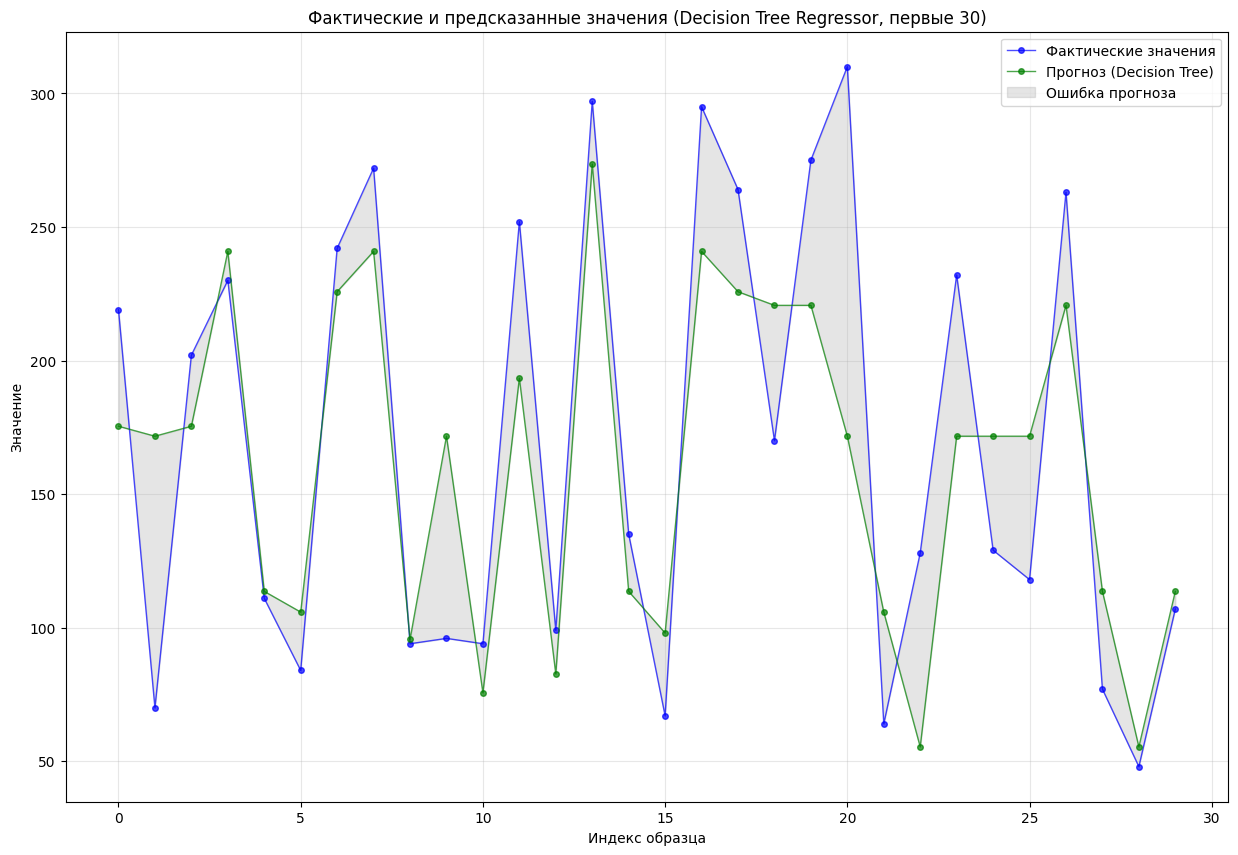

In [ ]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
indices = range(len(y_test))
ax1.plot(indices[:30], y_test.values[:30], 'bo-', label='Фактические значения',
                markersize=4, linewidth=1, alpha=0.7)
ax1.plot(indices[:30], y_pred[:30], 'go-', label='Прогноз (Decision Tree)',
                markersize=4, linewidth=1, alpha=0.7)
ax1.fill_between(indices[:30], y_test.values[:30], y_pred[:30],
                        alpha=0.2, color='gray', label='Ошибка прогноза')
ax1.set_xlabel('Индекс образца')
ax1.set_ylabel('Значение')
ax1.set_title('Фактические и предсказанные значения (Decision Tree Regressor, первые 30)')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)